In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.laborfunctions as lf
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from dask.diagnostics import ProgressBar

# Load Data

## Capacity Data

In [2]:
# Load ESM2M labor capacity data
ds_esm2m = xr.open_mfdataset('../data/processed/GFDL/Monthly_Capacity/monthly_capacity_ens*_1950-2100.nc',combine='nested',concat_dim='ensemble',chunks={'time':1095})
ds_esm2m = ds_esm2m.rename({'__xarray_dataarray_variable__':'capacity'})

In [3]:
# Calculate 1980-2000 baseline by month
with ProgressBar():
    ds_base = lf.calc_baseline(ds_esm2m).compute()

[########################################] | 100% Completed | 37.7s


In [4]:
# Shorten capacity dataset to 2000-2100
ds_esm2m = ds_esm2m.sel(time=slice('2000-01-31',None))['capacity']

## Population/Land Area Data

In [5]:
# Population data
ds_pop = xr.open_dataset('../data/processed/GFDL/population_regrid_esm2m.nc')['population']
ds_pop = ds_pop.where(np.isfinite(ds_pop),0)
ds_pop = ds_pop.rename({'latitude':'lat','longitude':'lon'})

In [6]:
# Load area data
land_area = xr.open_dataset('../data/processed/GFDL/esm2m.land_area')['land_area']
land_mask = np.isfinite(land_area)
# Replace NaN with 0 
land_area_adj = land_area.where(land_mask,0)

## Calculate ToEs

In [7]:
# Labor reduction thresholds used to define ToE
labor_thres = [0.9,0.8,0.7]

# Calculate ToEs for all grid cells and ensemble members
with ProgressBar():
    ds_toe = lf.toe_summer(ds_esm2m,ds_base,labor_thres).compute()

[########################################] | 100% Completed |  2min 39.6s
[########################################] | 100% Completed |  4.1s
[########################################] | 100% Completed |  4.4s
[########################################] | 100% Completed |  3.7s
[########################################] | 100% Completed |  4.4s
[########################################] | 100% Completed |  3.7s


# ToE Plots

## Spatial Maps

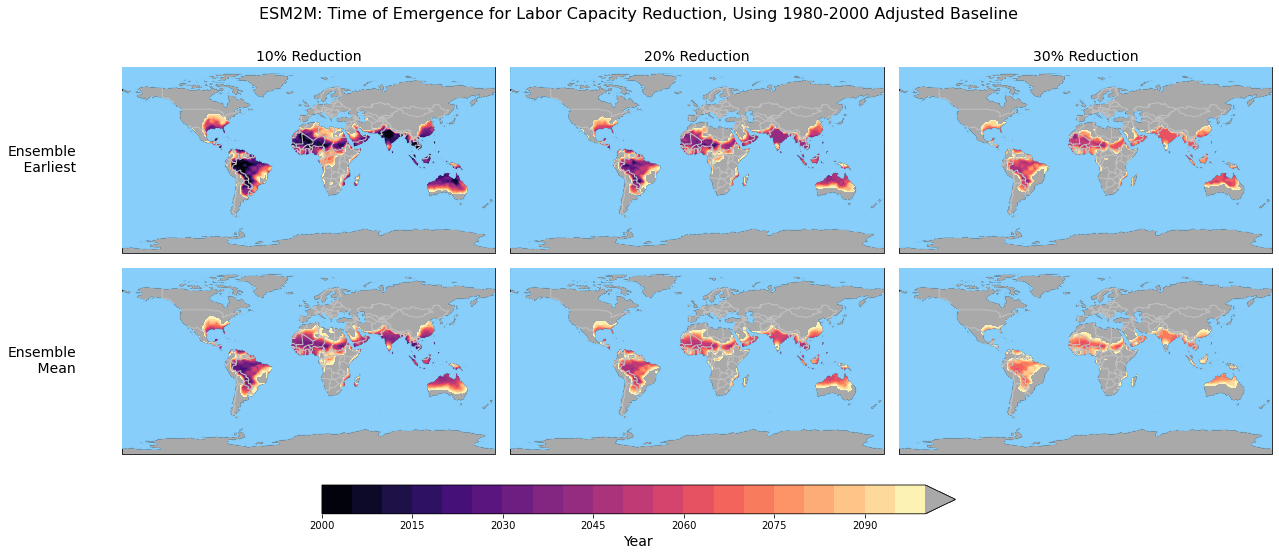

In [8]:
lf.spatial_toe(ds_toe,'ESM2M: Time of Emergence for Labor Capacity Reduction, Using 1980-2000 Adjusted Baseline')

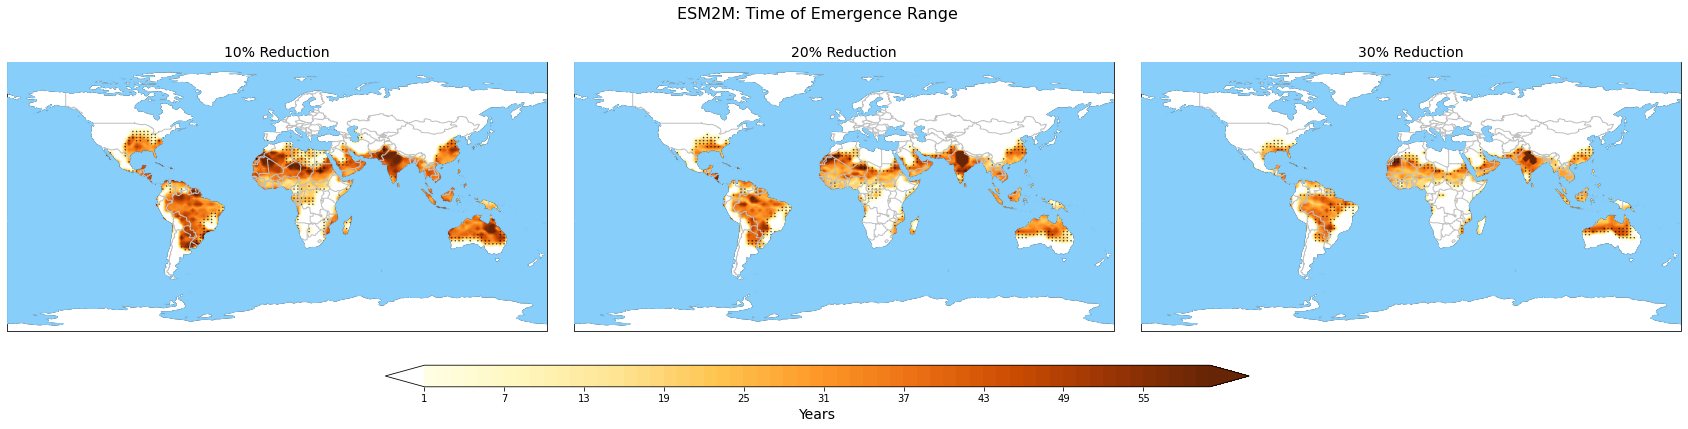

In [9]:
lf.spatial_toe_diff(ds_toe,'ESM2M: Time of Emergence Range',s=1,linewidths=0.4)

# Bar Charts

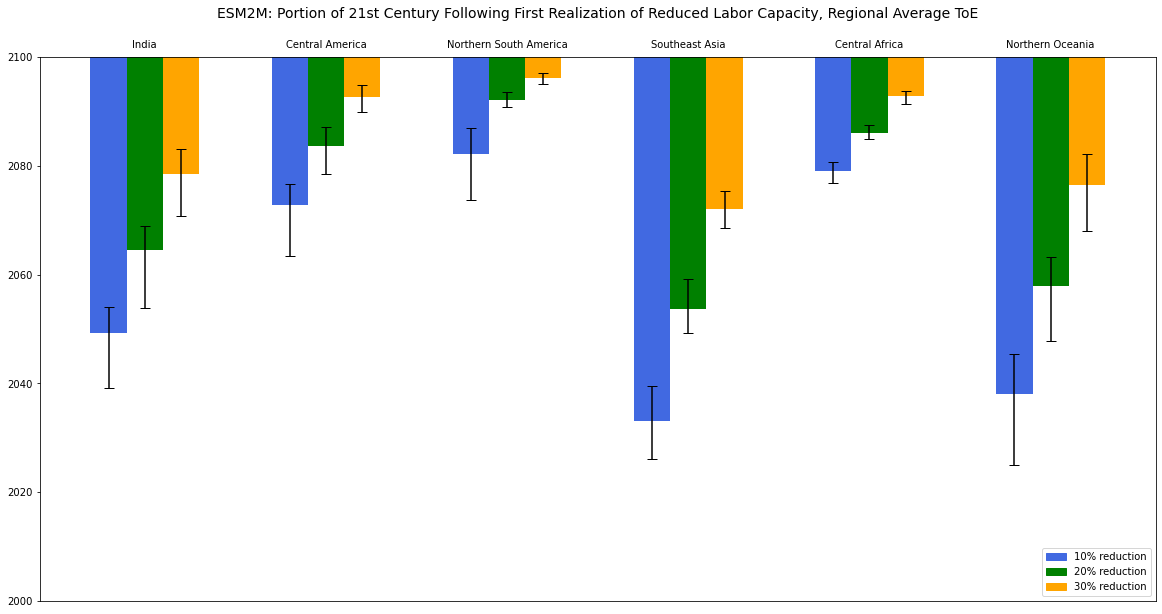

In [15]:
lf.average_toe_bar(ds_toe,ds_pop,'GFDL','ESM2M: Portion of 21st Century Following First Realization of Reduced Labor Capacity, Regional Average ToE\n')

# Time Series

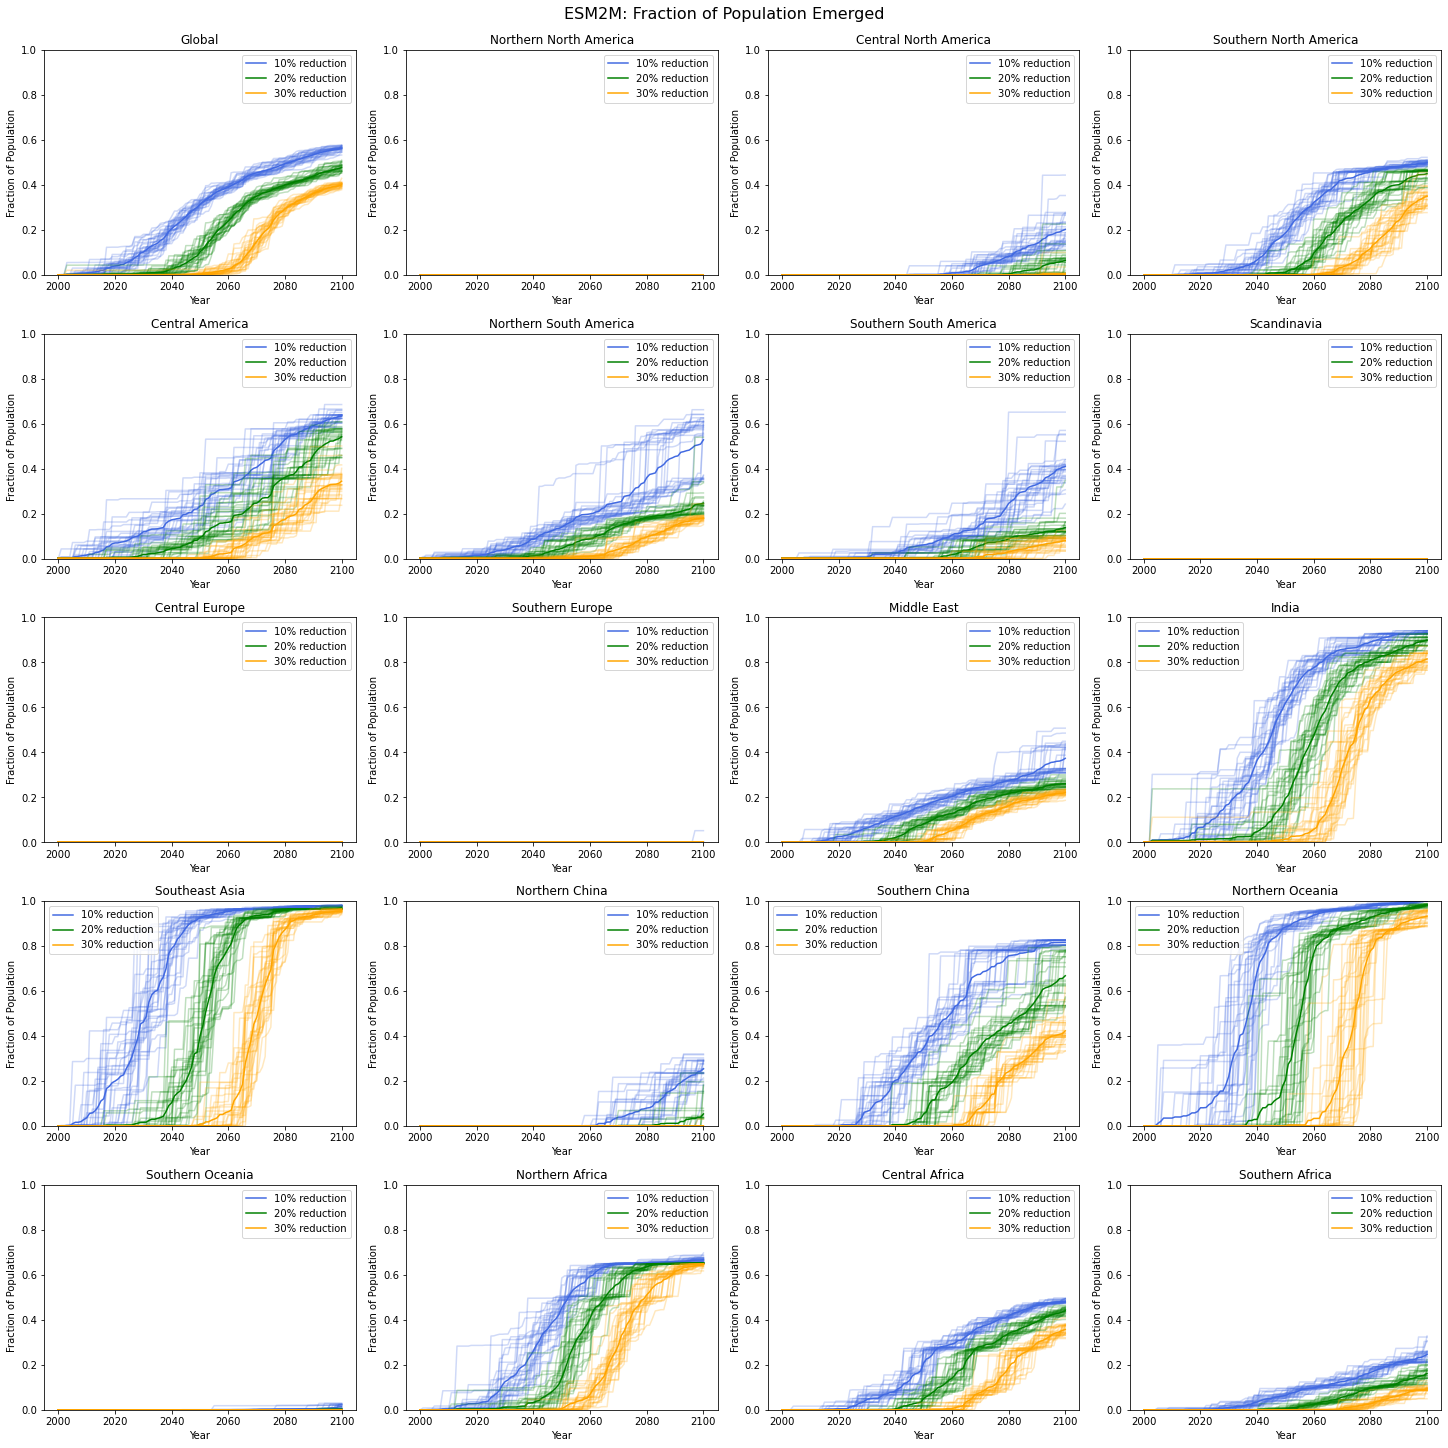

In [26]:
lf.frac_emerge_all(ds_toe,ds_pop,'GFDL','Fraction of Population','ESM2M: Fraction of Population Emerged')

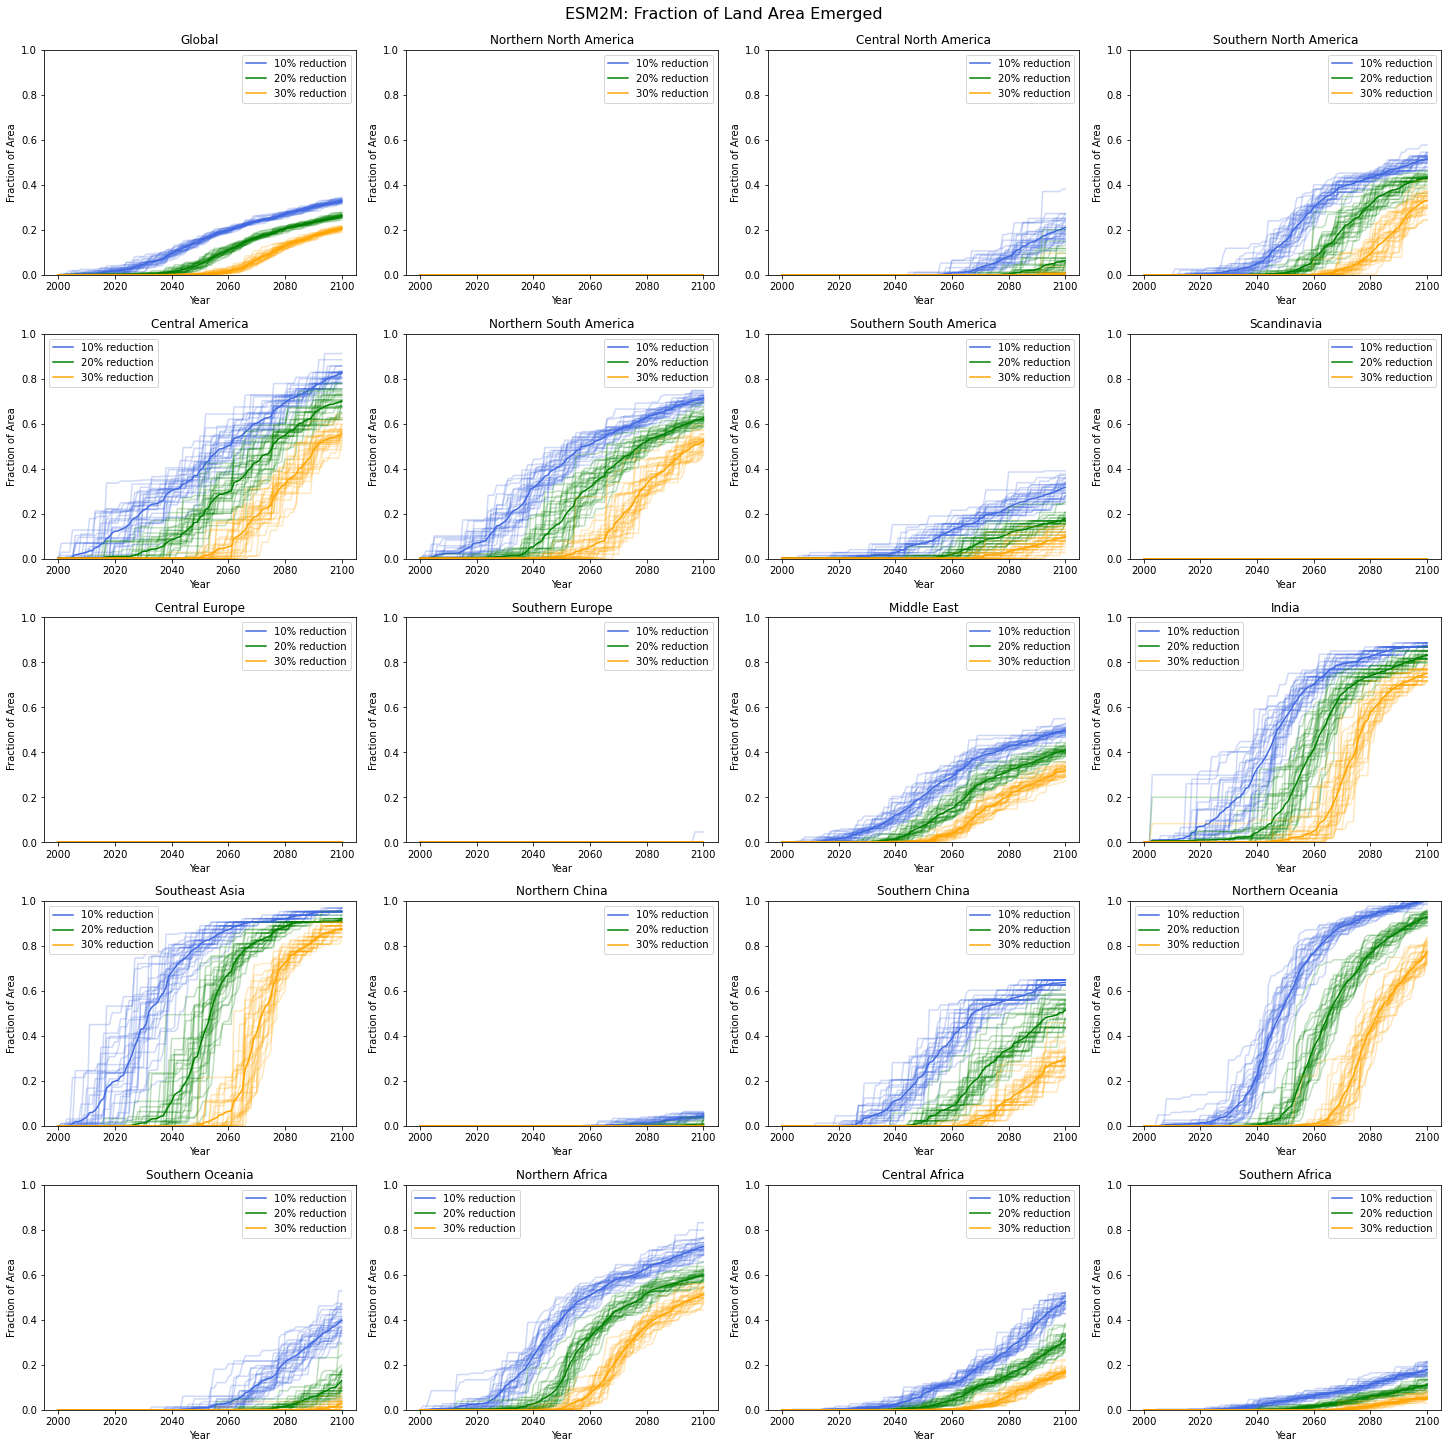

In [27]:
lf.frac_emerge_all(ds_toe,land_area_adj,'GFDL','Fraction of Area','ESM2M: Fraction of Land Area Emerged')